# Plot ImageCollection

The `geetools` extention contains a set of functions for rendering charts from the results of spatiotemporal reduction of images within an `ee.ImageCollection`. The choice of function dictates the arrangement of data in the chart, i.e., what defines x- and y-axis values and what defines the series. Use the following function descriptions and examples to determine the best function for your purpose.

[![github](https://img.shields.io/badge/-see%20sources-white?logo=github&labelColor=555)](https://github.com/gee-community/geetools/blob/main/docs/usage/plot/plot-imagecollection.ipynb)
[![colab](https://img.shields.io/badge/-open%20in%20colab-blue?logo=googlecolab&labelColor=555)](https://colab.research.google.com/github/gee-community/geetools/blob/main/docs/usage/plot/plot-imagecollection.ipynb)

In [1]:
import ee, pytest_gee, os

if "EARTHENGINE_SERVICE_ACCOUNT" in os.environ:
    pytest_gee.init_ee_from_service_account()
elif "EARTHENGINE_PROJECT" in os.environ:
    pytest_gee.init_ee_from_token()
else:
    raise ValueError("Cannot authenticate with Earth Engine.")

## Set up environment

Install all the required libs if necessary and perform the import satements upstream.

In [2]:
# uncomment if installation of libs is necessary
# !pip install earthengine-api geetools

In [3]:
from matplotlib import pyplot as plt

import ee
import geetools #noqa: F401

In [4]:
# uncomment if authetication to GEE is needed
# ee.Authenticate()
# ee.Intialize(project="<your_project>")

## Example data 

The following examples rely on a `ee.FeatureCollection` composed of three ecoregion features that define regions by which to reduce image data. The ImageCollection data loads the modis vegetation indicies and subset the 2010 2020 decade of images.

In [5]:
## Import the example feature collection and drop the data property.
ecoregions = (
    ee.FeatureCollection("projects/google/charts_feature_example")
    .select(["label", "value", "warm"])
)


## Load MODIS vegetation indices data and subset a decade of images.
vegIndices = (
    ee.ImageCollection("MODIS/061/MOD13A1")
    .filter(ee.Filter.date("2010-01-01", "2020-01-01"))
    .select(["NDVI", "EVI"])
)

## Plot dates

The `plot_dates*` methods will plot the values of the image collection using their dates as x-axis values.

### series by bands 

Image date is plotted along the x-axis according to the `dateProperty` property. Series are defined by image bands. Y-axis values are the reduction of images, by date, for a single region.

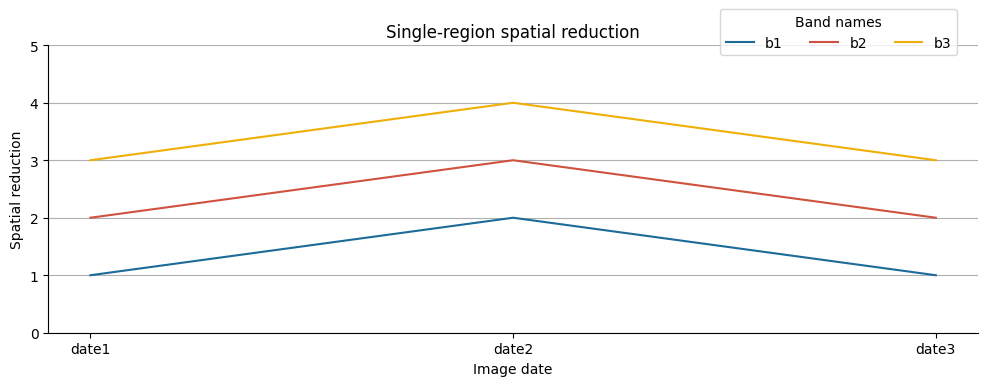

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))

# Sample data (replace these with your actual data)
dates = ["date1", "date2", "date3"]
b1 = [1, 2, 1]
b2 = [2, 3, 2]
b3 = [3, 4, 3]

# Create the plot
ax.plot(dates, b1, label="b1", color="#1d6b99")
ax.plot(dates, b2, label="b2", color="#cf513e")
ax.plot(dates, b3, label="b3", color="#f0af07")

# Add titles and labels
ax.set_title('Single-region spatial reduction')
ax.set_xlabel('Image date')
ax.set_ylabel('Spatial reduction')

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15), ncol=3, title='Band names')

# set the grid display
ax.grid(axis="y")
ax.set_ylim(0, 5)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

Use `plot_series_by_bands` to display an image time series for a given region; each image band is presented as a unique series. It is useful for comparing the time series of individual image bands. Here, a MODIS image collection with bands representing NDVI and EVI vegetation indices are plotted. The date of every image observation is included along the x-axis, while the mean reduction of pixels intersecting a forest ecoregion defines the y-axis.

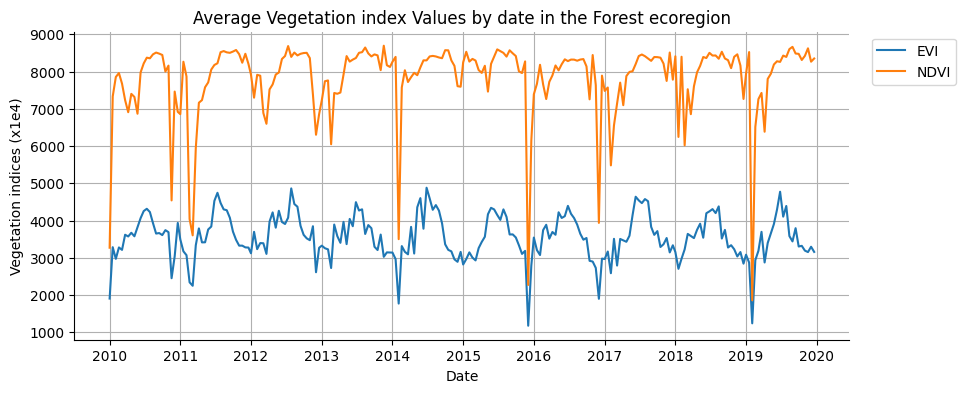

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
region = ecoregions.filter(ee.Filter.eq("label", "Forest"))
vegIndices.geetools.plot_dates_by_bands(
    region = region.geometry(),
    reducer = "mean",
    scale = 500,
    bands = ["NDVI", "EVI"],
    ax = ax,
    dateProperty = "system:time_start",
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_ylabel("Vegetation indices (x1e4)")
ax.set_title("Average Vegetation index Values by date in the Forest ecoregion")

plt.show()

### Plot series by region

Image date is plotted along the x-axis according to the `dateProperty` property. Series are defined by regions. Y-axis values are the reduction of images, by date, for a single image band.

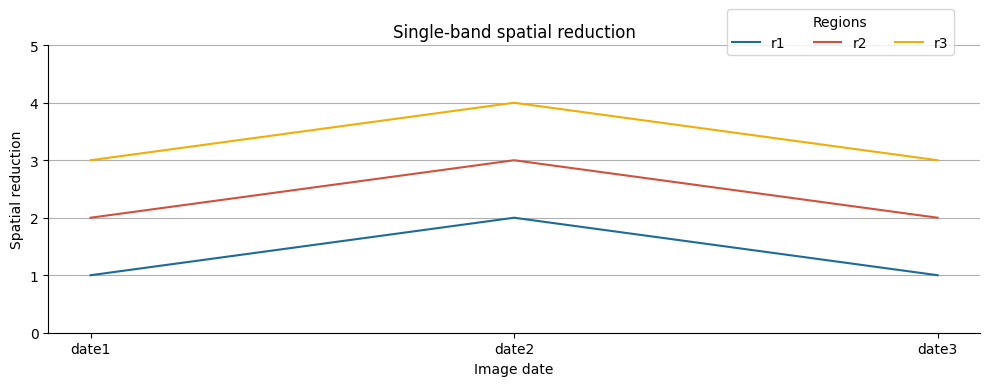

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))

# Sample data (replace these with your actual data)
dates = ["date1", "date2", "date3"]
b1 = [1, 2, 1]
b2 = [2, 3, 2]
b3 = [3, 4, 3]

# Create the plot
ax.plot(dates, b1, label="r1", color="#1d6b99")
ax.plot(dates, b2, label="r2", color="#cf513e")
ax.plot(dates, b3, label="r3", color="#f0af07")

# Add titles and labels
ax.set_title("Single-band spatial reduction")
ax.set_xlabel("Image date")
ax.set_ylabel("Spatial reduction")

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15), ncol=3, title='Regions')

# set the grid display
ax.grid(axis="y")
ax.set_ylim(0, 5)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

Use `plot_dates_by_regions` to display a single image band time series for multiple regions; each region is presented as a unique series. It is useful for comparing the time series of a single band among several regions. Here, a MODIS image collection representing an NDVI time series is plotted for three ecoregions. The date of every image observation is included along the x-axis, while mean reduction of pixels intersecting forest, desert, and grasslands ecoregions define y-axis series.

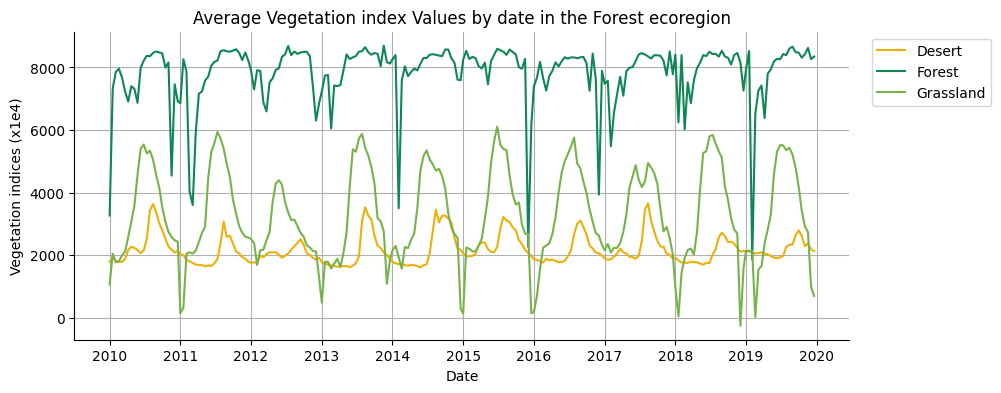

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
region = ecoregions.filter(ee.Filter.eq("label", "Forest"))
vegIndices.geetools.plot_dates_by_regions(
    band = "NDVI",
    regions = ecoregions,
    label = "label",
    reducer = "mean",
    scale = 500,
    ax = ax,
    dateProperty = "system:time_start",
    colors = ['#f0af07', '#0f8755', '#76b349']
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_ylabel("Vegetation indices (x1e4)")
ax.set_title("Average Vegetation index Values by date in the Forest ecoregion")

plt.show()

## PLot DOY

DOY stands for day of year. The `plot_doyseries*` methods will plot the values of the image collection using the day of year as x-axis values.

Note that `.plot_doyseries*` functions take two reducers: one for region reduction (`regionReducer`) and another for intra-annual coincident day-of-year reduction (`yearReducer`). Examples in the following sections use `ee.Reducer.mean()` as the argument for both of these parameters.

### Plot DOY by bands 

Image day-of-year is plotted along the x-axis according to the `dateProperty` property. Series are defined by image bands. Y-axis values are the reduction of image pixels in a given region, grouped by day-of-year.

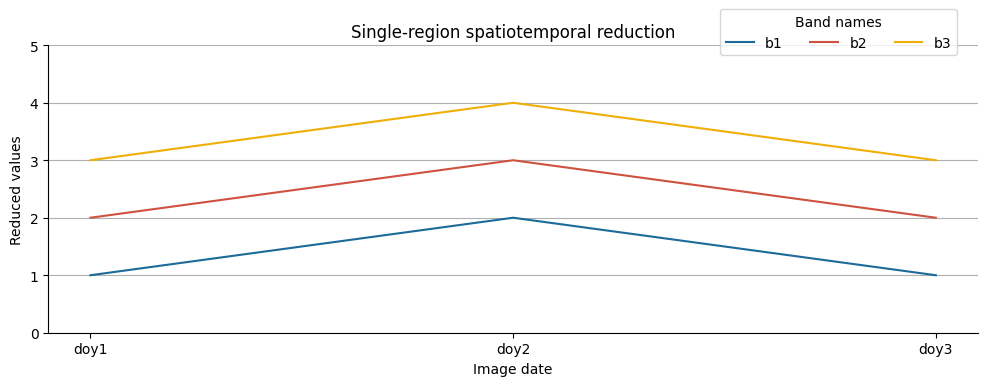

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))

# Sample data (replace these with your actual data)
dates = ["doy1", "doy2", "doy3"]
b1 = [1, 2, 1]
b2 = [2, 3, 2]
b3 = [3, 4, 3]

# Create the plot
ax.plot(dates, b1, label="b1", color="#1d6b99")
ax.plot(dates, b2, label="b2", color="#cf513e")
ax.plot(dates, b3, label="b3", color="#f0af07")

# Add titles and labels
ax.set_title("Single-region spatiotemporal reduction")
ax.set_xlabel("Image date")
ax.set_ylabel("Reduced values")

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15), ncol=3, title='Band names')

# set the grid display
ax.grid(axis="y")
ax.set_ylim(0, 5)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

Use `plot_doy_by_bands` to display a day-of-year time series for a given region; each image band is presented as a unique series. It is useful for reducing observations occurring on the same day-of-year, across multiple years, to compare e.g. average annual NDVI and EVI profiles from MODIS, as in this example.

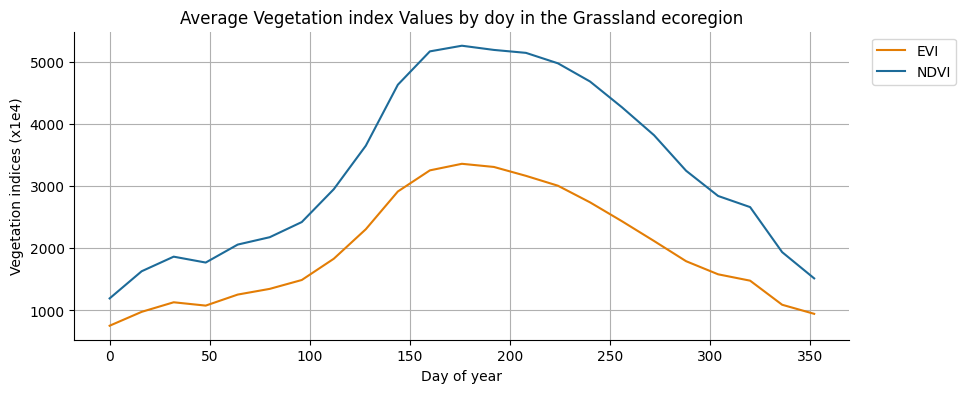

In [11]:
fig, ax = plt.subplots(figsize=(10,4))

vegIndices.geetools.plot_doy_by_bands(
    region = ecoregions.filter(ee.Filter.eq("label", "Grassland")).geometry(),
    spatialReducer = "mean",
    timeReducer = "mean",
    scale = 500,
    bands = ["NDVI", "EVI"],
    ax = ax,
    dateProperty = "system:time_start",
    colors = ['#e37d05', '#1d6b99']
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_ylabel("Vegetation indices (x1e4)")
ax.set_title("Average Vegetation index Values by doy in the Grassland ecoregion")

plt.show()

### Plot doy by regions 

Image day-of-year is plotted along the x-axis according to the `dateProperty` property. Series are defined by regions. Y-axis values are the reduction of image pixels in a given region, grouped by day-of-year, for a selected image band.


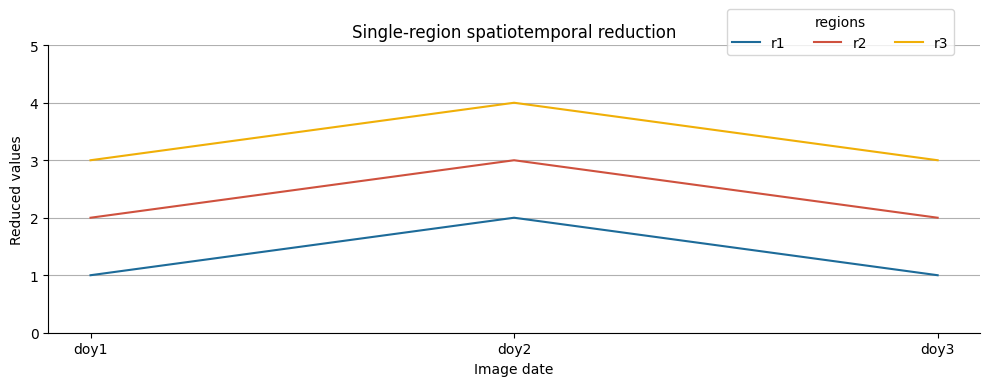

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))

# Sample data (replace these with your actual data)
dates = ["doy1", "doy2", "doy3"]
b1 = [1, 2, 1]
b2 = [2, 3, 2]
b3 = [3, 4, 3]

# Create the plot
ax.plot(dates, b1, label="r1", color="#1d6b99")
ax.plot(dates, b2, label="r2", color="#cf513e")
ax.plot(dates, b3, label="r3", color="#f0af07")

# Add titles and labels
ax.set_title("Single-region spatiotemporal reduction")
ax.set_xlabel("Image date")
ax.set_ylabel("Reduced values")

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15), ncol=3, title='regions')

# set the grid display
ax.grid(axis="y")
ax.set_ylim(0, 5)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

Use `plot_doy_by_regions` to display a single image band day-of-year time series for multiple regions, where each distinct region is presented as a unique series. It is useful for comparing annual single-band time series among regions. For instance, in this example, annual MODIS-derived NDVI profiles for forest, desert, and grassland ecoregions are plotted, providing a convenient comparison of NDVI response by region. Note that intra-annual observations occurring on the same day-of-year are reduced by their mean.

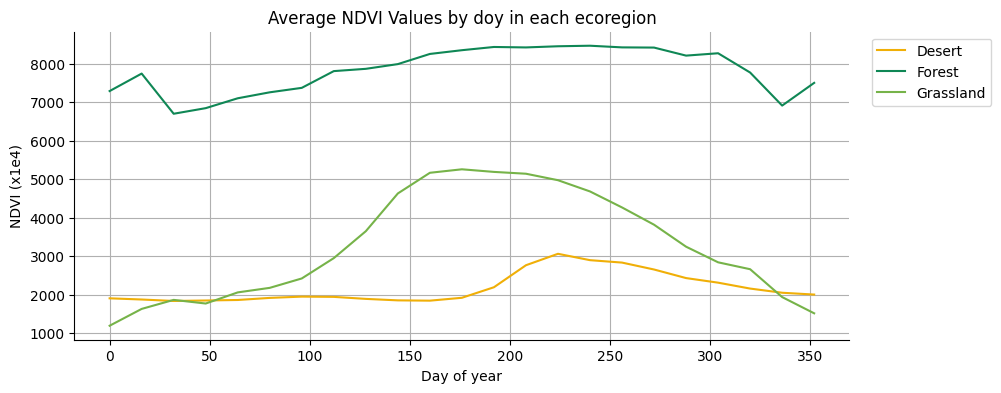

In [13]:
fig, ax = plt.subplots(figsize=(10,4))

vegIndices.geetools.plot_doy_by_regions(
    regions = ecoregions,
    label = "label",
    spatialReducer = "mean",
    timeReducer = "mean",
    scale = 500,
    band = "NDVI",
    ax = ax,
    dateProperty = "system:time_start",
    colors = ['#f0af07', '#0f8755', '#76b349']
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_ylabel("NDVI (x1e4)")
ax.set_title("Average NDVI Values by doy in each ecoregion")

plt.show()

### plot doy by year 

Image day-of-year is plotted along the x-axis according to the `dateProperty` property. Series are defined by years present in the ImageCollection. Y-axis values are the reduction of image pixels in a given region, grouped by day-of-year, for a selected image band.

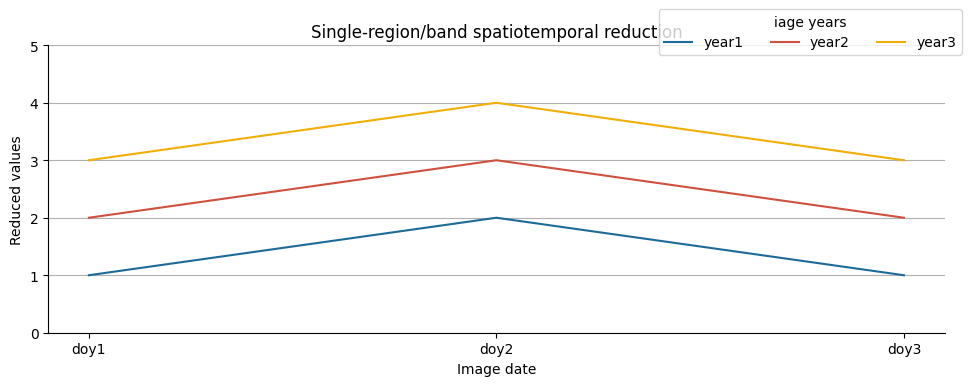

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))

# Sample data (replace these with your actual data)
dates = ["doy1", "doy2", "doy3"]
b1 = [1, 2, 1]
b2 = [2, 3, 2]
b3 = [3, 4, 3]

# Create the plot
ax.plot(dates, b1, label="year1", color="#1d6b99")
ax.plot(dates, b2, label="year2", color="#cf513e")
ax.plot(dates, b3, label="year3", color="#f0af07")

# Add titles and labels
ax.set_title("Single-region/band spatiotemporal reduction")
ax.set_xlabel("Image date")
ax.set_ylabel("Reduced values")

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15), ncol=3, title='iage years')

# set the grid display
ax.grid(axis="y")
ax.set_ylim(0, 5)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

Use `plot_doy_by_years` to display a day-of-year time series for a given region and image band, where each distinct year in the image collection is presented as a unique series. It is useful for comparing annual time series among years. For instance, in this example, annual MODIS-derived NDVI profiles for a grassland ecoregion are plotted for years 2012 and 2019, providing convenient year-over-year interpretation.

In [15]:
# reduce the regions to grassland
grassland = ecoregions.filter(ee.Filter.eq("label", "Grassland"))

# for plot speed and lisibility only keep 2 years (2010 and 2020) for the example
indices = vegIndices.filter(
        ee.Filter.Or(
            ee.Filter.date("2012-01-01", "2012-12-31"),
            ee.Filter.date("2019-01-01", "2019-12-31"),
        )
)

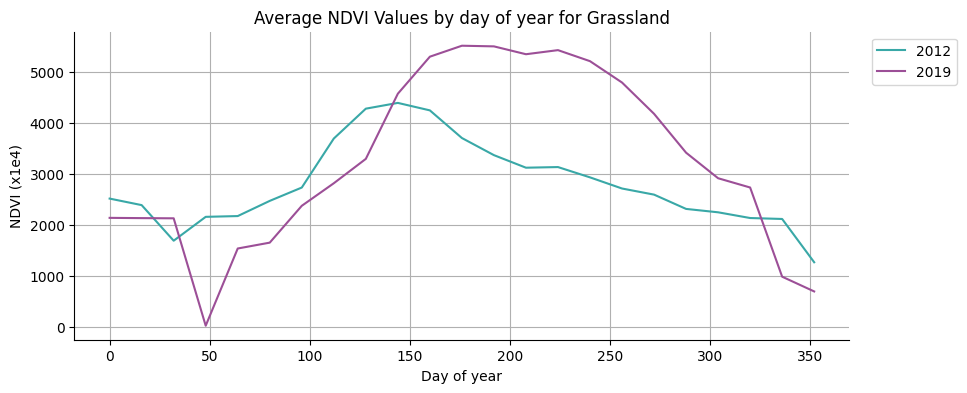

In [16]:
fig, ax = plt.subplots(figsize=(10,4))

indices.geetools.plot_doy_by_years(
    band = "NDVI",
    region = grassland.geometry(),
    reducer = "mean",
    scale = 500,
    ax = ax,
    colors = ['#39a8a7', '#9c4f97']
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_ylabel("NDVI (x1e4)")
ax.set_title("Average NDVI Values by day of year for Grassland")

plt.show()